## Grid figure

Create a figure showing an example cubed sphere grid for Lompe. 

Import relevant modules:

In [1]:
import numpy as np
import lompe
import matplotlib.pyplot as plt

Specify projection, grid size and location (we place this grid over the British Isles) and make inner and outer grid objects:

In [2]:
# set up projection:
position = (-4, 55) # lon, lat
orientation = (-1, 3) # east, north
projection = lompe.cs.CSprojection(position, orientation)

# set up grid:
L, W, Lres, Wres = 1300e3, 900e3, 300.e3, 250.e3 # dimensions and resolution of grid
inner_grid  = lompe.cs.CSgrid(projection, L, W, Lres, Wres, R = 6481.2e3)

# make a dummy lompe model object to set up outer grid:
_ = lompe.Emodel(inner_grid, [lambda x, y:1]*2)
outer_grid = _.grid_E

Show how the grid looks on map:

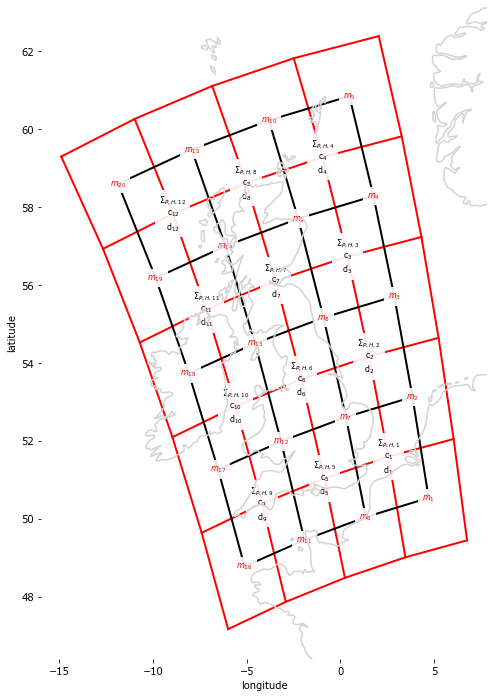

In [3]:
fig = plt.figure(figsize = (8, 12))
ax = fig.add_subplot(111)

# plot grids
for v in inner_grid.get_grid_boundaries():
    ax.plot(v[0], v[1], 'k-', linewidth = 2, zorder = 2)

for v in outer_grid.get_grid_boundaries():
    ax.plot(v[0], v[1], 'r-', linewidth = 2, zorder = 1)

ax.scatter(outer_grid.lon.flatten(), outer_grid.lat.flatten(), marker = '*', c = 'red')

# add text to center of grid cells
la, lo = outer_grid.lat.flatten(), outer_grid.lon.flatten()
for i in range(outer_grid.size):
    ax.text(lo[i], la[i], r'$m_{' + str(i+1) + '}$', va = 'center', ha = 'center', color = 'red', bbox=dict(facecolor='white', linewidth=0, alpha=0.9), size = 8)

la, lo = inner_grid.lat.flatten(), inner_grid.lon.flatten()
for i in range(inner_grid.size):
    ax.text(lo[i], la[i], r'$\Sigma_{P,H,' + str(i+1) + '}$\nc$_{' + str(i+1) + '}$\nd$_{' + str(i+1) + '}$', va = 'center', ha = 'center', bbox=dict(facecolor='white', linewidth=0, alpha=0.9), size = 8)

# longitude, latitude ticks
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

# add coastlines
xlim, ylim = ax.get_xlim(), ax.get_ylim()
for cl in projection.get_projected_coastlines():
    xi, eta = cl
    lon, lat = projection.cube2geo(xi, eta)
    ax.plot(lon, lat, zorder = 20, color = 'lightgrey')
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# save figures
plt.savefig('./output_figures/grid_illustration.png', dpi = 250)
plt.savefig('./output_figures/grid_illustration.pdf')

For illustration purposes, the plotted grid is much coarser than the grids used for actual calculations. Shown in a cylindrical projection. The figure shows an example grid in red, with electric field SECS poles with amplitudes $m_i$ at the center of each grid cell.